<a href="https://colab.research.google.com/github/LucasVale98/Formacao_Machine_Learning/blob/main/Machine_Learning_Introducao_a_classificacao_com_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install graphviz==0.10
!apt-get install graphviz

  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


# **01. Intrdução á Classificação**

**O primeiro projeto: Primeiro treino e teste de um modelo de classificação**

In [ ]:
# features (1 sim, 0 não)
# pelo longo? 
# perna curta?
# faz auau?

porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cahorro1 = [0,1,1]
cahorro2 = [1,0,1]
cahorro3 = [1,1,1]

In [ ]:
# 1 => porco, 0 => cachorro

dados = [porco1, porco2, porco3, cahorro1, cahorro2, cahorro3]
classes = [1,1,1,0,0,0]

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
modelo = LinearSVC()
modelo.fit(dados, classes)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
animal_misterioso = [1,1,1]
modelo.predict([animal_misterioso])

array([0])

In [ ]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

testes = [misterio1, misterio2, misterio3]
previsoes = modelo.predict(teste)
previsoes

array([0, 1, 0])

In [ ]:
testes_classes = [0,1,1]
testes_classes

[0, 1, 1]

In [ ]:
corretos = (previsoes == testes_classes).sum()
total = len(testes)
taxa_de_acerto = corretos/total
print("Taxa de acertos: ", taxa_de_acerto * 100)

Taxa de acertos:  66.66666666666666


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
taxa_de_acerto = accuracy_score(testes_classes, previsoes)
print("Taxa de acertos, com o accuracy_score():", taxa_de_acerto * 100)

Taxa de acertos, com o accuracy_score(): 66.66666666666666


**Padronização de nomes**

In [ ]:
# 1 => porco, 0 => cachorro

treino_x = [porco1, porco2, porco3, cahorro1, cahorro2, cahorro3]
treino_y = [1,1,1,0,0,0]

In [ ]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
teste_x = [misterio1, misterio2, misterio3]
teste_y = [0,1,1]

In [ ]:
previsoes = modelo.predict(teste_x)

In [ ]:
taxa_de_acerto = accuracy_score(teste_y, previsoes)
print("Taxa de acertos, com o accuracy_score(): %.2f" % (taxa_de_acerto * 100))

Taxa de acertos, com o accuracy_score(): 66.67


# **02. Testes replicáveis, estratificação e lendo**

**Lendo dados da internet e manipulando os mesmos**

In [ ]:
import pandas as pdm

In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)

In [ ]:
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [ ]:
x = dados[["home", "how_it_works",	"contact"]]
y = dados["bought"] 

In [ ]:
dados.shape

(99, 4)

In [ ]:
treino_x = x[:75]
treino_y = y[:75]

teste_x = x[75:]
teste_y = y[75:]

In [ ]:
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 75 elementos e testaremos com 24 elementos


In [ ]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
previsoes = modelo.predict(teste_x)
acuracia =  accuracy_score(teste_y, previsoes) * 100

print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 95.83%


**Estratificando splits**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
treino_x, treino_y, teste_x, teste_y = train_test_split(
    x,y, test_size = 0.25, random_state=20, stratify = y )

In [ ]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
previsoes = modelo.predict(teste_x)
acuracia =  accuracy_score(teste_y, previsoes) * 100

print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 95.83%


# **03. Um projeto de baixa dimensionalidade e baseline**

 **Testando em duas dimensões**

In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [ ]:
import seaborn as sns

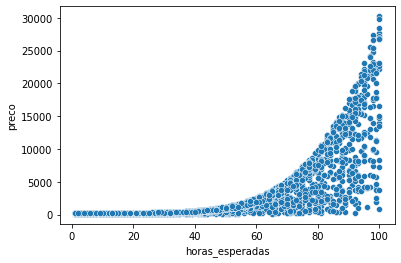

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

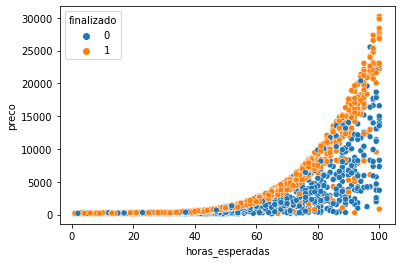

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

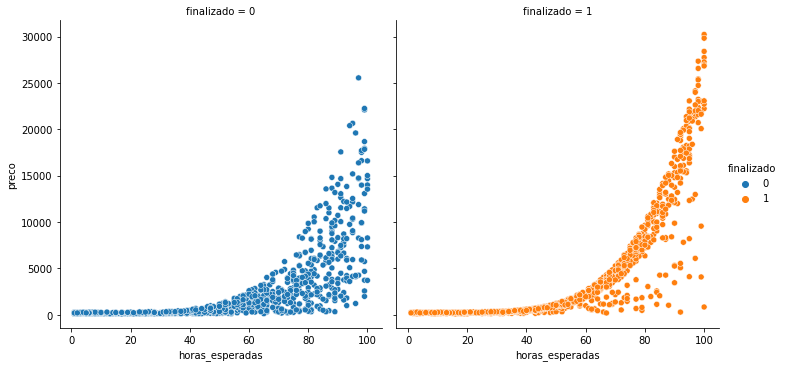

In [ ]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [ ]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [ ]:
treino_x, treino_y, teste_x, teste_y = train_test_split(
    x,y, test_size = 0.20, random_state=20, stratify = y )

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
acuracia =  accuracy_score(teste_y, previsoes) * 100

print("A acurácia foi %.2f%%" % acuracia)

ValueError: ignored

# **04. Dummy classifiers e árvore de decisão**

**Trabalhando num novo projeto**

In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_renomear = { 
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_trocar = {
    'no': 0,
    'yes': 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [ ]:
dados ['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [ ]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [ ]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [ ]:
import numpy as np

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 62.80%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**Dummy classifiers e svc**

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 52.44%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 50.68%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 58.00%


In [ ]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 52.64%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


**Árvore de decisão e visualizando as decisões de um estimador**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier()
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 73.32%


In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(modelo, out_file=None)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[0] <= 59999.074\\ngini = 0.487\\nsamples = 7500\\nvalue = [3150, 4350]"] ;\n1 [label="X[0] <= 40070.154\\ngini = 0.202\\nsamples = 3248\\nvalue = [370, 2878]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 1441\\nvalue = [0, 1441]"] ;\n1 -> 2 ;\n3 [label="X[0] <= 40723.646\\ngini = 0.326\\nsamples = 1807\\nvalue = [370, 1437]"] ;\n1 -> 3 ;\n4 [label="X[0] <= 40644.25\\ngini = 0.441\\nsamples = 61\\nvalue = [20, 41]"] ;\n3 -> 4 ;\n5 [label="X[1] <= 21.5\\ngini = 0.397\\nsamples = 55\\nvalue = [15, 40]"] ;\n4 -> 5 ;\n6 [label="X[0] <= 40086.025\\ngini = 0.346\\nsamples = 45\\nvalue = [10, 35]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n6 -> 7 ;\n8 [label="X[0] <= 40171.676\\ngini = 0.325\\nsamples = 44\\nvalue = [9, 35]"] ;\n6 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 8\\nvalue = [0, 8]"] ;\n8 -> 9 ;\n10 [label="X[0] <= 40200.314\\ngini = 0.375\\nsamples = 36\\

In [ ]:
'digraph Tree {\nnode [shape=box] ;\n0 [label="X[0] <= 59999.074\\ngini = 0.487\\nsamples = 7500\\nvalue = [3150, 4350]"] ;\n1 [label="X[0] <= 40070.154\\ngini = 0.202\\nsamples = 3248\\nvalue = [370, 2878]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 1441\\nvalue = [0, 1441]"] ;\n1 -> 2 ;\n3 [label="X[0] <= 40723.646\\ngini = 0.326\\nsamples = 1807\\nvalue = [370, 1437]"] ;\n1 -> 3 ;\n4 [label="gini = 0.441\\nsamples = 61\\nvalue = [20, 41]"] ;\n3 -> 4 ;\n5 [label="gini = 0.321\\nsamples = 1746\\nvalue = [350, 1396]"] ;\n3 -> 5 ;\n6 [label="X[2] <= 24112.741\\ngini = 0.453\\nsamples = 4252\\nvalue = [2780, 1472]"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n7 [label="X[0] <= 99974.41\\ngini = 0.498\\nsamples = 2649\\nvalue = [1409, 1240]"] ;\n6 -> 7 ;\n8 [label="gini = 0.49\\nsamples = 2223\\nvalue = [1266, 957]"] ;\n7 -> 8 ;\n9 [label="gini = 0.446\\nsamples = 426\\nvalue = [143, 283]"] ;\n7 -> 9 ;\n10 [label="X[0] <= 100076.957\\ngini = 0.248\\nsamples = 1603\\nvalue = [1371, 232]"] ;\n6 -> 10 ;\n11 [label="gini = 0.086\\nsamples = 1356\\nvalue = [1295, 61]"] ;\n10 -> 11 ;\n12 [label="gini = 0.426\\nsamples = 247\\nvalue = [76, 171]"] ;\n10 -> 12 ;\n}'

In [ ]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(modelo, out_file=None)
grafico = graphviz.Source(dot_data)
grafico

NameError: ignored